In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Data Exploratory for Adult datasets

In [2]:
#Read the CSV File of Breast Cancer Dataset
df = pd.read_csv(r"datasets\Adult\adult.data")
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.columns = ["age","workclass","fnlwgt","education","education_num", "marital_status", "occupation","relationship", "race", "sex","capital_gain","capital_loss", "hours_per_week", "native_country" , "income"]
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
# Data Cleaning 
df.dropna()
for columns in df:
    df.drop(df.index[df[str(columns)] == " ?"], inplace = True)
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
# settings age into groups 1 : <20, 2 : >=20 < 30, 3 : >= 30 < 40, 4 : >= 40 < 50, 5 : >= 50 < 60, 6 : >=60 <70, 7 :  >= 70 < 80, 8 : >= 80 <=90

df["age"] = np.where((df["age"] <20) , 1,df["age"] )
df["age"] = np.where((df["age"] >= 20) & (df["age"] <30) , 2,df["age"] )
df["age"] = np.where((df["age"] >= 30) & (df["age"] <40) , 3,df["age"] )
df["age"] = np.where((df["age"] >= 40) & (df["age"] <50) , 4,df["age"] )
df["age"] = np.where((df["age"] >= 50) & (df["age"] <60) , 5,df["age"] )
df["age"] = np.where((df["age"] >= 60) & (df["age"] <70) , 6,df["age"] )
df["age"] = np.where((df["age"] >= 70) & (df["age"] <80) , 7,df["age"] )
df["age"] = np.where((df["age"] >= 80) & (df["age"] <=90) , 8,df["age"] )

|Column Name| Attribute|
|---|---|
|age| "<20" : 1 , ">=20 & <30" : 2, ">= 30 & < 40" : 3 , ">= 40 & <50" :4 , <br> ">= 50 & < 60" : 5 , ">= 60 & <70" : 6 , ">=70 & <80" : 7 , <br> ">= 80 & <= 90" : 8
|income| ">50k" : 1, "<= 50k" : 0
|workclass| " Private" : 1, " Self-emp-not-inc" : 2, " Self-emp-inc" : 3 , " Federal-gov" : 4, " Local-gov" : 5, " State-gov" : 6, " Without-pay" : 7, " Never-worked" : 8
|fnlwgt| continuous
|education| " Bachelors" : 13, " Some-college" : 10, " 11th" : 7, " HS-grad" : 9 , " Prof-school" : 15, " Assoc-acdm" : 12," Assoc-voc" : 11 , " 9th" : 5, " 7th-8th" : 4, " 12th" : 8, " Masters" : 14, " 1st-4th" : 2, " 10th" : 6, " Doctorate" : 16, " 5th-6th" : 3, " Preschool" : 1
|education-num| continuous
|marital-status| " Married-civ-spouse" : 1, " Divorced" : 2, " Never-married" : 3, " Separated" : 4, " Widowed" : 5, " Married-spouse-absent" : 6, " Married-AF-spouse" : 7
|occupation| " Tech-support" : 1, " Craft-repair" : 2, " Other-service" : 3, " Sales" : 4, " Exec-managerial" : 5, " Prof-specialty": 6, " Handlers-cleaners" : 7, " Machine-op-inspct" : 8, " Adm-clerical" :9, " Farming-fishing" : 10, " Transport-moving" : 11," Priv-house-serv":12, " Protective-serv" :13, " Armed-Forces" :14
|relationship| " Wife": 1, " Own-child" : 2, " Husband" : 3, " Not-in-family" :4, " Other-relative" : 5, " Unmarried" : 6
|race| " White" : 1, " Asian-Pac-Islander" : 2, " Amer-Indian-Eskimo" : 3, " Other" : 4, " Black" : 5
|sex| " Male" : 1 ," Female" : 0
|capital-gain| continuous
|capital-loss| continuous
|hours-per-week| continuous
|native-country| " United-States" : 1 , " Cambodia" : 2, " England" :3 ," Puerto-Rico" : 4, " Canada" : 5, " Germany" : 6, " Outlying-US(Guam-USVI-etc)" : 7, " India" : 8 , " Japan" : 9, " Greece" : 10, " South" :11 ," China" : 12, " Cuba" : 13, "Iran" : 14, " Honduras" : 15, " Philippines" : 16, " Italy" : 17, " Poland" : 18, " Jamaica" : 19, " Vietnam" : 20 , " Mexico" :21 ," Portugal" : 22, " Ireland" : 23, " France" : 24, " Dominican-Republic" : 25, " Laos" : 26, " Ecuador" : 27, " Taiwan" : 28," Haiti" : 29," Columbia": 30 , " Hungary" : 31, " Guatemala" : 32, " Nicaragua" : 33, " Scotland" : 34, " Thailand" :35 , " Yugoslavia" : 36, " El-Salvador" : 37 , " Trinadad&Tobago" : 38 , " Peru" : 39, " Hong" : 40, " Holand-Netherlands" :41
             

In [6]:
newValues = {" >50K" : 1, " <=50K" : 0 , " Private" : 1, " Self-emp-not-inc" : 2, " Self-emp-inc" : 3, " Federal-gov" : 4, " Local-gov" : 5, " State-gov" : 6, " Without-pay" : 7, " Never-worked" :8,
             " Bachelors" : 13, " Some-college" : 10, " 11th" : 7, " HS-grad" : 9 , " Prof-school" : 15, " Assoc-acdm" : 12,
             " Assoc-voc" : 11 , " 9th" : 5, " 7th-8th" : 4, " 12th" : 8, " Masters" : 14, " 1st-4th" : 2, " 10th" : 6, " Doctorate" : 16, " 5th-6th" : 3, " Preschool" : 1,
             " Married-civ-spouse" : 1, " Divorced" : 2, " Never-married" : 3, " Separated" : 4, " Widowed" : 5, " Married-spouse-absent" : 6, " Married-AF-spouse" : 7,
             " Tech-support" : 1, " Craft-repair" : 2, " Other-service" : 3, " Sales" : 4, " Exec-managerial" : 5, " Prof-specialty": 6, " Handlers-cleaners" : 7, " Machine-op-inspct" : 8, " Adm-clerical" :9, " Farming-fishing" : 10, " Transport-moving" : 11," Priv-house-serv":12, " Protective-serv" :13, " Armed-Forces" :14,
             " Male" : 1 ," Female" : 0, " Wife": 1, " Own-child" : 2, " Husband" : 3, " Not-in-family" :4, " Other-relative" : 5, " Unmarried" : 6, 
             " White" : 1, " Asian-Pac-Islander" : 2, " Amer-Indian-Eskimo" : 3, " Other" : 4, " Black" : 5, 
             " United-States" : 1 , " Cambodia" : 2, " England" :3 ," Puerto-Rico" : 4, " Canada" : 5, " Germany" : 6, " Outlying-US(Guam-USVI-etc)" : 7, 
             " India" : 8 , " Japan" : 9, " Greece" : 10, " South" :11 ," China" : 12, " Cuba" : 13, " Iran" : 14, " Honduras" : 15, " Philippines" : 16, " Italy" : 17, " Poland" : 18, " Jamaica" : 19, " Vietnam" : 20 , " Mexico" :21 ," Portugal" : 22, " Ireland" : 23, " France" : 24, " Dominican-Republic" : 25, " Laos" : 26, " Ecuador" : 27, " Taiwan" : 28," Haiti" : 29," Columbia": 30 , " Hungary" : 31, " Guatemala" : 32, 
             " Nicaragua" : 33, " Scotland" : 34, " Thailand" :35 , " Yugoslavia" : 36, " El-Salvador" : 37 , " Trinadad&Tobago" : 38 , " Peru" : 39, " Hong" : 40, " Holand-Netherlands" :41}
df.replace(newValues, inplace = True)
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,5,2,83311,13,13,1,5,3,1,1,0,0,13,1,0
1,3,1,215646,9,9,2,7,4,1,1,0,0,40,1,0
2,5,1,234721,7,7,1,7,3,5,1,0,0,40,1,0
3,2,1,338409,13,13,1,6,1,5,0,0,0,40,13,0
4,3,1,284582,14,14,1,5,1,1,0,0,0,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,2,1,257302,12,12,1,1,1,1,0,0,0,38,1,0
32556,4,1,154374,9,9,1,8,3,1,1,0,0,40,1,1
32557,5,1,151910,9,9,5,9,6,1,0,0,0,40,1,0
32558,2,1,201490,9,9,3,9,2,1,1,0,0,20,1,0


Based on first intuition, we want to create a model that predicts the income level of the adult. Some possible correlations are workclass, education, occupation. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30161 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30161 non-null  int64
 1   workclass       30161 non-null  int64
 2   fnlwgt          30161 non-null  int64
 3   education       30161 non-null  int64
 4   education_num   30161 non-null  int64
 5   marital_status  30161 non-null  int64
 6   occupation      30161 non-null  int64
 7   relationship    30161 non-null  int64
 8   race            30161 non-null  int64
 9   sex             30161 non-null  int64
 10  capital_gain    30161 non-null  int64
 11  capital_loss    30161 non-null  int64
 12  hours_per_week  30161 non-null  int64
 13  native_country  30161 non-null  int64
 14  income          30161 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


0    22653
1     7508
Name: income, dtype: int64


<AxesSubplot: >

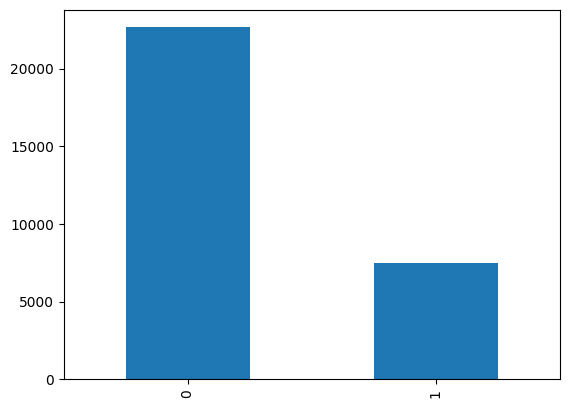

In [8]:
print(df["income"].value_counts())
plotdata = df["income"].value_counts()
plotdata.plot(kind ="bar")

|Columns|Attribute
|---|---
|income| ">50k" : 1, "<= 50k" : 0

From the given datset, there are 22653 adults with income <= 50k and 7508 adults with income > 50k

3    8210
2    7415
4    6900
5    4185
6    1634
1    1369
7     357
8      91
Name: age, dtype: int64


<AxesSubplot: xlabel='age', ylabel='Count'>

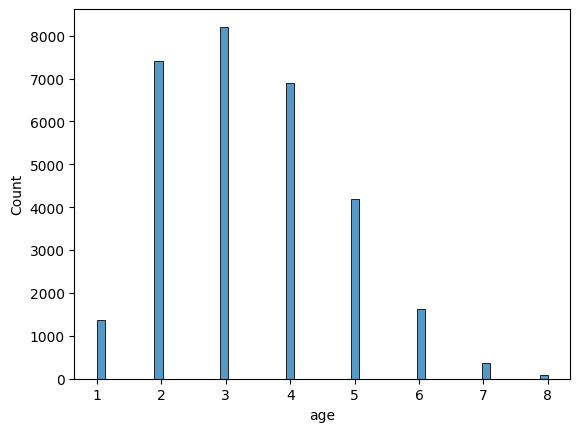

In [9]:
print(df["age"].value_counts())
sns.histplot(df["age"])

|Column Name| Attribute|
|---|---|
|age| "<20" : 1 , ">=20 & <30" : 2, ">= 30 & < 40" : 3 , ">= 40 & <50" :4 , <br> ">= 50 & < 60" : 5 , ">= 60 & <70" : 6 , ">=70 & <80" : 7 , <br> ">= 80 & <= 90" : 8

There are predominantly large number of adults with age >=30 and < 40. Age might be a factor in the income level due to level of experience and expertise.

6     4038
2     4030
5     3992
9     3720
4     3584
3     3212
8     1966
11    1572
7     1350
10     989
1      912
13     644
12     143
14       9
Name: occupation, dtype: int64


<AxesSubplot: >

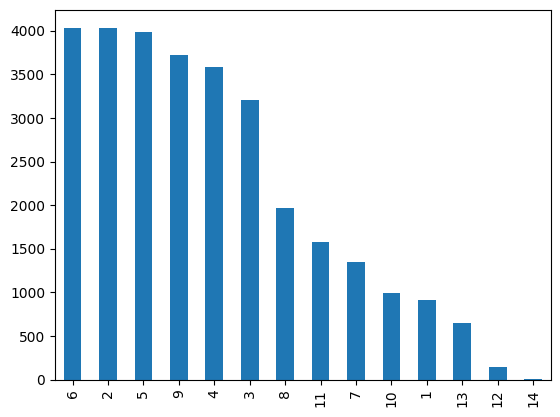

In [10]:
print(df["occupation"].value_counts())
plotdata = df["occupation"].value_counts()
plotdata.plot(kind ="bar")

|Column Name| Attribute|
|---|---|
|occupation| " Tech-support" : 1, " Craft-repair" : 2, " Other-service" : 3, " Sales" : 4, " Exec-managerial" : 5, " Prof-specialty": 6, " Handlers-cleaners" : 7, " Machine-op-inspct" : 8, " Adm-clerical" :9, " Farming-fishing" : 10, " Transport-moving" : 11," Priv-house-serv":12, " Protective-serv" :13, " Armed-Forces" :14


Most adults work in Tech-support, different jobs may suggest the difference in income levels.

1    22286
2     2499
5     2067
6     1278
3     1074
4      943
7       14
Name: workclass, dtype: int64


<AxesSubplot: >

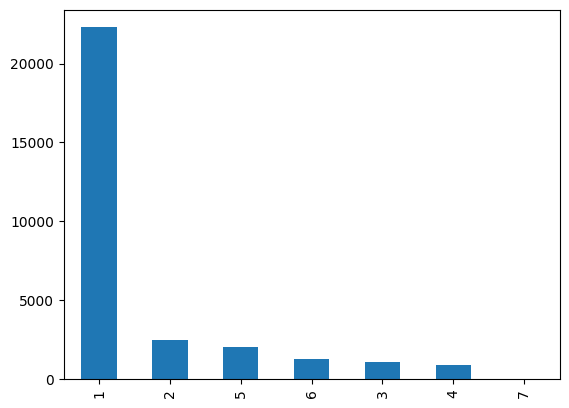

In [11]:
print(df["workclass"].value_counts())
plotdata = df["workclass"].value_counts()
plotdata.plot(kind ="bar")

|Column Name| Attribute|
|---|---|
|workclass| " Private" : 1, " Self-emp-not-inc" : 2, " Self-emp-inc" : 3 , " Federal-gov" : 4, " Local-gov" : 5, " State-gov" : 6, " Without-pay" : 7, " Never-worked" : 8


Most adults in this dataset are working in the private sector, the working class of an adult may determine the income level.

9     9840
10    6678
13    5043
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: education, dtype: int64


<AxesSubplot: >

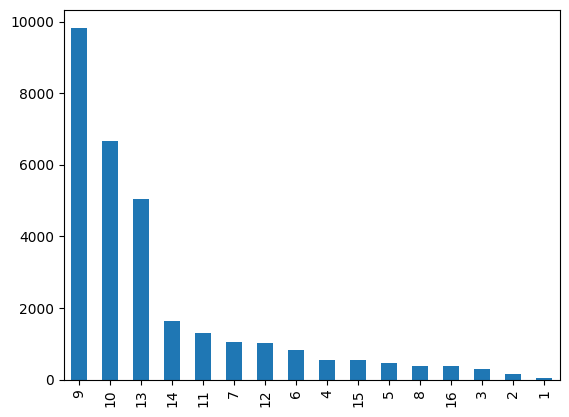

In [12]:
print(df["education"].value_counts())
plotdata = df["education"].value_counts()
plotdata.plot(kind ="bar")

|Column Name| Attribute|
|---|---|
|education| " Bachelors" : 13, " Some-college" : 10, " 11th" : 7, " HS-grad" : 9 , " Prof-school" : 15, " Assoc-acdm" : 12, " Assoc-voc" : 11 , " 9th" : 5, " 7th-8th" : 4, " 12th" : 8, " Masters" : 14, " 1st-4th" : 2, " 10th" : 6, " Doctorate" : 16, " 5th-6th" : 3, " Preschool" : 1


Most adults in the dataset are high school grads. The level of education may suggest different level of pay-scale/income

9     9840
10    6678
13    5043
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: education_num, dtype: int64


<AxesSubplot: >

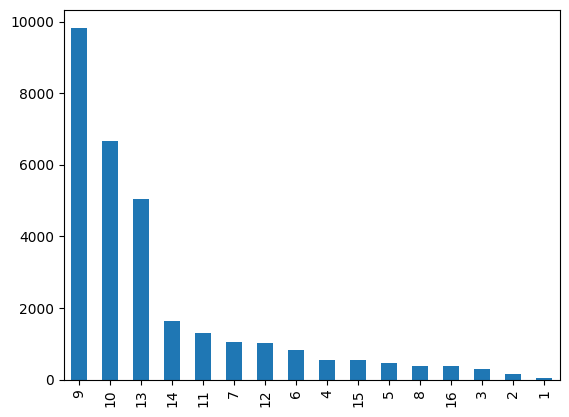

In [13]:
print(df["education_num"].value_counts())
plotdata = df["education_num"].value_counts()
plotdata.plot(kind ="bar")

1    14065
3     9725
2     4214
4      939
5      827
6      370
7       21
Name: marital_status, dtype: int64


<AxesSubplot: >

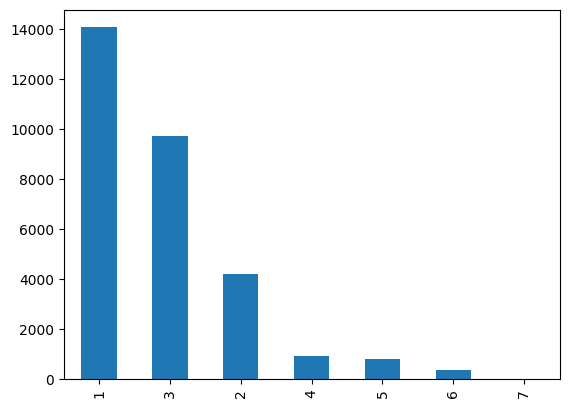

In [14]:
print(df["marital_status"].value_counts())
plotdata = df["marital_status"].value_counts()
plotdata.plot(kind ="bar")

|Column Name| Attribute|
|---|---|
|marital-status| " Married-civ-spouse" : 1, " Divorced" : 2, " Never-married" : 3, " Separated" : 4, " Widowed" : 5, " Married-spouse-absent" : 6, " Married-AF-spouse" : 7


The top 2 number of adults martial-status are married-civ-spouse and Never-married, marital-status may be suggestive of income level to a certain extent

3    12463
4     7725
2     4466
6     3212
1     1406
5      889
Name: relationship, dtype: int64


<AxesSubplot: >

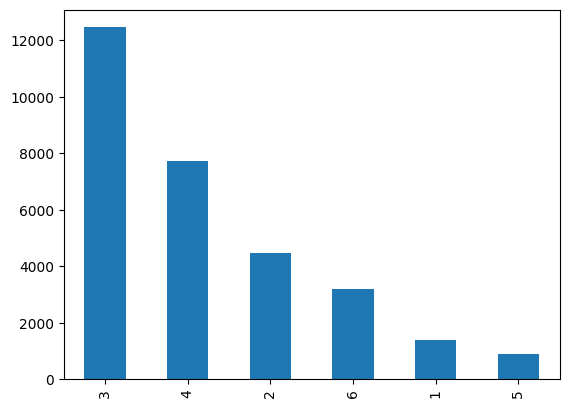

In [15]:
print(df["relationship"].value_counts())
plotdata = df["relationship"].value_counts()
plotdata.plot(kind ="bar")

|Column Name| Attribute|
|---|---|
|relationship| " Wife": 1, " Own-child" : 2, " Husband" : 3, " Not-in-family" :4, " Other-relative" : 5, " Unmarried" : 6


1    25932
5     2817
2      895
3      286
4      231
Name: race, dtype: int64


<AxesSubplot: >

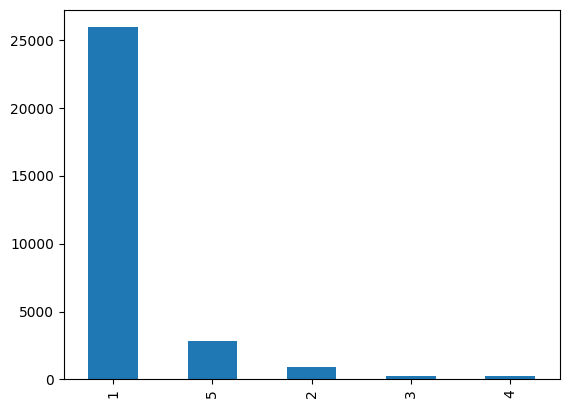

In [16]:
print(df["race"].value_counts())
plotdata = df["race"].value_counts()
plotdata.plot(kind ="bar")

|Column Name| Attribute|
|---|---|
|race| " White" : 1, " Asian-Pac-Islander" : 2, " Amer-Indian-Eskimo" : 3, " Other" : 4, " Black" : 5


In the dataset, most adults' race are white, there might be a possibility that your income level is affected by your race.

1    20379
0     9782
Name: sex, dtype: int64


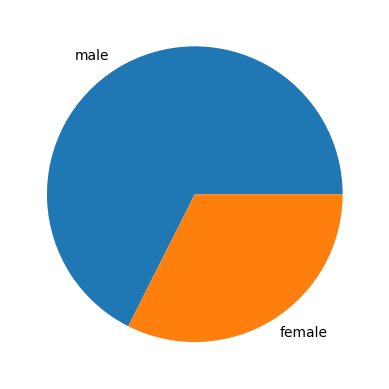

In [17]:
print(df["sex"].value_counts())
plt.pie(df['sex'].value_counts(), labels = ["male","female"])
plt.show()

|Column Name| Attribute|
|---|---|
|sex| " Male" : 1 ," Female" : 0


There are predominantly more males than females than females and there is a possibility that gender affects your income.

0        27624
15024      337
7688       270
7298       240
99999      148
         ...  
1639         1
6097         1
2538         1
1455         1
1086         1
Name: capital_gain, Length: 118, dtype: int64


<AxesSubplot: xlabel='capital_gain', ylabel='Count'>

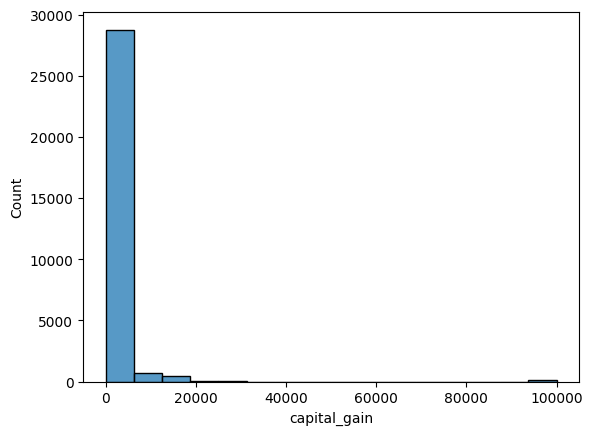

In [18]:
print(df["capital_gain"].value_counts())
sns.histplot(df["capital_gain"])

0       28734
1902      194
1977      162
1887      155
1848       50
        ...  
2080        1
4356        1
1539        1
1844        1
1411        1
Name: capital_loss, Length: 90, dtype: int64


<AxesSubplot: xlabel='capital_loss', ylabel='Count'>

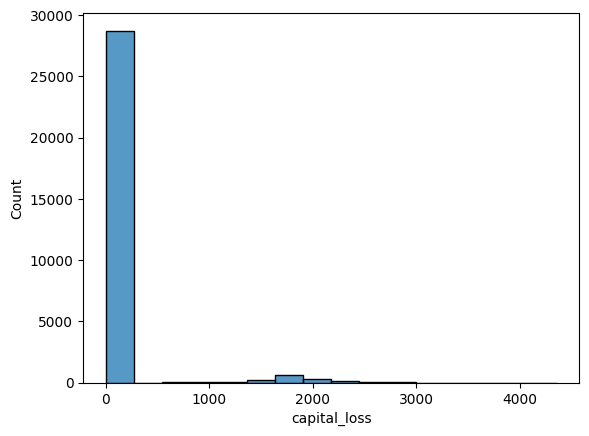

In [19]:
print(df["capital_loss"].value_counts())
sns.histplot(df["capital_loss"])

1     27503
21      610
16      188
6       128
4       109
5       107
8       100
37      100
13       92
3        86
19       80
11       71
12       68
17       68
25       67
20       64
32       63
9        59
18       56
30       56
14       42
28       42
29       42
22       34
33       33
39       30
10       29
24       27
27       27
23       24
40       19
2        18
38       18
35       17
26       17
36       16
7        14
31       13
15       12
34       11
41        1
Name: native_country, dtype: int64


<AxesSubplot: >

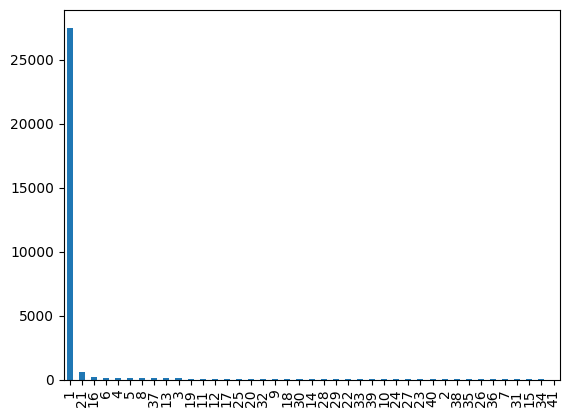

In [20]:
print(df["native_country"].value_counts())
plotdata = df["native_country"].value_counts()
plotdata.plot(kind ="bar")

|Column Name| Attribute|
|---|---|
|native-country| " United-States" : 1 , " Cambodia" : 2, " England" :3 ," Puerto-Rico" : 4, " Canada" : 5, " Germany" : 6, " Outlying-US(Guam-USVI-etc)" : 7, " India" : 8 , " Japan" : 9, " Greece" : 10, " South" :11 ," China" : 12, " Cuba" : 13, "Iran" : 14, " Honduras" : 15, " Philippines" : 16, " Italy" : 17, " Poland" : 18, " Jamaica" : 19, " Vietnam" : 20 , " Mexico" :21 ," Portugal" : 22, " Ireland" : 23, " France" : 24, " Dominican-Republic" : 25, " Laos" : 26, " Ecuador" : 27, " Taiwan" : 28," Haiti" : 29," Columbia": 30 , " Hungary" : 31, " Guatemala" : 32, " Nicaragua" : 33, " Scotland" : 34, " Thailand" :35 , " Yugoslavia" : 36, " El-Salvador" : 37 , " Trinadad&Tobago" : 38 , " Peru" : 39, " Hong" : 40, " Holand-Netherlands" :41

Most adult's native country is in the US, however, companies may have differing salaries in different native-country

In [21]:
df.corr()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
age,1.000000,0.133110,-0.075393,0.046053,0.046053,-0.224711,0.024066,0.121740,-0.023195,0.081127,0.077738,0.059316,0.101393,-0.035023,0.236053
workclass,0.133110,1.000000,-0.026720,0.179098,0.179098,-0.054797,0.128694,0.013421,0.035026,-0.005384,0.013690,0.022565,0.027530,-0.055732,0.085731
fnlwgt,-0.075393,-0.026720,1.000000,-0.044954,-0.044954,0.028873,0.003797,0.015289,0.099240,0.025387,0.000427,-0.009757,-0.022889,0.101707,-0.008978
education,0.046053,0.179098,-0.044954,1.000000,1.000000,-0.103047,-0.039277,-0.033313,-0.079057,0.006131,0.124413,0.079656,0.152528,-0.164772,0.335317
education_num,0.046053,0.179098,-0.044954,1.000000,1.000000,-0.103047,-0.039277,-0.033313,-0.079057,0.006131,0.124413,0.079656,0.152528,-0.164772,0.335317
marital_status,-0.224711,-0.054797,0.028873,-0.103047,-0.103047,1.000000,0.017613,0.367936,0.132574,-0.383133,-0.073531,-0.069379,-0.226755,0.052476,-0.378675
occupation,0.024066,0.128694,0.003797,-0.039277,-0.039277,0.017613,1.000000,0.011328,0.042579,-0.044684,-0.012196,-0.014482,0.039837,0.000860,-0.045109
relationship,0.121740,0.013421,0.015289,-0.033313,-0.033313,0.367936,0.011328,1.000000,0.121143,-0.179065,-0.026875,-0.031754,0.052895,0.043994,-0.179109
race,-0.023195,0.035026,0.099240,-0.079057,-0.079057,0.132574,0.042579,0.121143,1.000000,-0.118933,-0.020828,-0.028400,-0.061668,0.054019,-0.096069
sex,0.081127,-0.005384,0.025387,0.006131,0.006131,-0.383133,-0.044684,-0.179065,-0.118933,1.000000,0.048811,0.047017,0.231272,0.000602,0.216715


<AxesSubplot: >

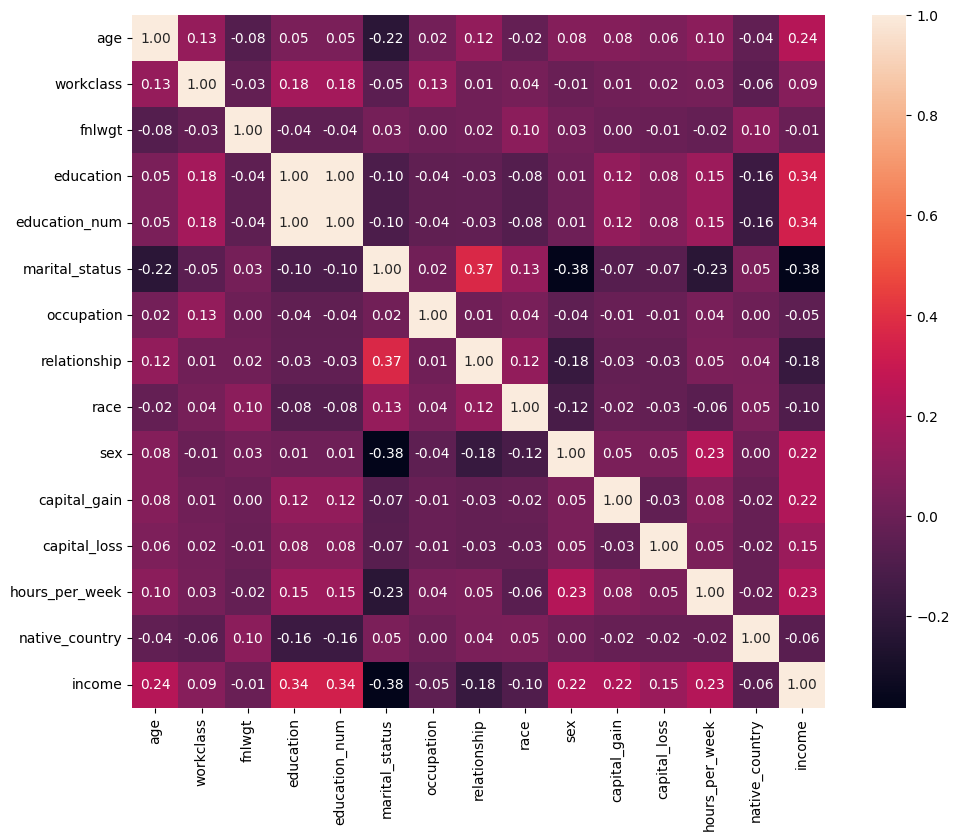

In [22]:
correlation_mat = df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(correlation_mat, vmax= 1, annot = True, square = True, fmt= ".2f")

Based on the correlation of different attributes to income. We will remove all attributes that have a negative correlation to it.

In [23]:
df.drop("fnlwgt" , axis = 1, inplace = True)
df.drop("marital_status" , axis = 1 , inplace = True)
df.drop("relationship" , axis = 1 , inplace = True)
df.drop("occupation" , axis = 1 , inplace = True)
df.drop("race" , axis = 1 , inplace = True)
df.drop("hours_per_week" , axis = 1 , inplace = True)
df.drop("native_country" , axis = 1 , inplace = True)
df

,age,workclass,education,education_num,sex,capital_gain,capital_loss,income
0,5,2,13,13,1,0,0,0
1,3,1,9,9,1,0,0,0
2,5,1,7,7,1,0,0,0
3,2,1,13,13,0,0,0,0
4,3,1,14,14,0,0,0,0
...,...,...,...,...,...,...,...,...
32555,2,1,12,12,0,0,0,0
32556,4,1,9,9,1,0,0,1
32557,5,1,9,9,0,0,0,0
32558,2,1,9,9,1,0,0,0


In [24]:
#Extract the attributes into a list
def extract_df_col(df):
    df = df.copy()
    class_column = df.pop('income')
    df['income'] = class_column
    record_list = []
    for col in df.columns:
        record_list.append(col)
    print(record_list)
    return(record_list)

In [25]:
adult_list = extract_df_col(df)
with open("datasets\Adult\cleaned_attributes.txt", "w") as output:
    output.write(str(adult_list))

['age', 'workclass', 'education', 'education_num', 'sex', 'capital_gain', 'capital_loss', 'income']


## Create Training and Testing sets for prediction

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
dectree = DecisionTreeClassifier()

In [27]:
y = df["income"]
x = df.drop("income", axis = 1)

In [28]:
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size = 0.25, random_state = 2)

print("Train set: \t", xTrain.shape,yTrain.shape)
print("Test set: \t", xTest.shape,yTest.shape)

Train set: 	 (22620, 7) (22620,)
Test set: 	 (7541, 7) (7541,)


### Classification Decision Tree Method

In [29]:
dectree.fit(xTrain,yTrain)

DecisionTreeClassifier()

In [30]:
dt_pred = dectree.predict(xTest)
print(dt_pred)

[0 1 0 ... 0 0 0]


In [31]:
adult_dt_df = pd.DataFrame(data = dt_pred, columns = ["income"])
adult_dt_df.head(15)

,income
0,0
1,1
2,0
3,0
4,1
5,1
6,0
7,0
8,0
9,0


In [32]:
print("Classification Accuracy for Training set \t: ", dectree.score(xTrain,yTrain))
print("Classification Accuracy for Testing set \t: ", dectree.score(xTest,yTest))

Classification Accuracy for Training set 	:  0.8553934571175951
Classification Accuracy for Testing set 	:  0.8353003580426999


In [33]:
dtAccuracy = accuracy_score(yTest,dt_pred)
dtFscore = f1_score(yTest,dt_pred, average = "weighted")
print(f"The accuracy of Decision Tree is {dtAccuracy}")
print(f"The F score of Decision Tree is {dtFscore}")

The accuracy of Decision Tree is 0.8353003580426999
The F score of Decision Tree is 0.8245957047629531


In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,dt_pred)
cm

array([[5311,  334],
       [ 908,  988]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

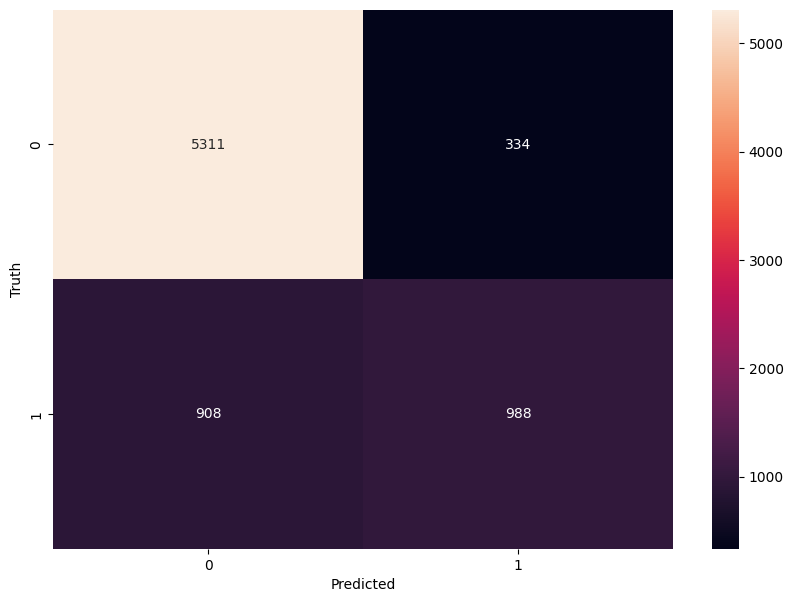

In [35]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [36]:
xTestDF = xTest.copy()
xTestDF.insert(len(xTestDF.columns), "yTest income", yTest)
xTestDF = xTestDF.reset_index(drop=True)
xTestDF.head(15)

,age,workclass,education,education_num,sex,capital_gain,capital_loss,yTest income
0,3,1,9,9,0,0,0,0
1,3,4,14,14,1,0,0,1
2,3,1,7,7,1,0,0,0
3,3,1,10,10,0,0,0,0
4,3,1,13,13,1,0,2246,1
5,5,1,11,11,1,0,0,0
6,4,1,9,9,0,0,0,1
7,2,1,9,9,1,0,0,0
8,2,1,9,9,1,0,0,0
9,5,1,9,9,1,0,0,1


In [37]:
xTestDF.insert(len(xTestDF.columns), "Decision Tree", adult_dt_df)
xTestDF.head(20)

,age,workclass,education,education_num,sex,capital_gain,capital_loss,yTest income,Decision Tree
0,3,1,9,9,0,0,0,0,0
1,3,4,14,14,1,0,0,1,1
2,3,1,7,7,1,0,0,0,0
3,3,1,10,10,0,0,0,0,0
4,3,1,13,13,1,0,2246,1,1
5,5,1,11,11,1,0,0,0,1
6,4,1,9,9,0,0,0,1,0
7,2,1,9,9,1,0,0,0,0
8,2,1,9,9,1,0,0,0,0
9,5,1,9,9,1,0,0,1,0


### Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

index : 9 
Accuracy : 0.8335764487468506


Text(0, 0.5, 'Testing Accuracy')

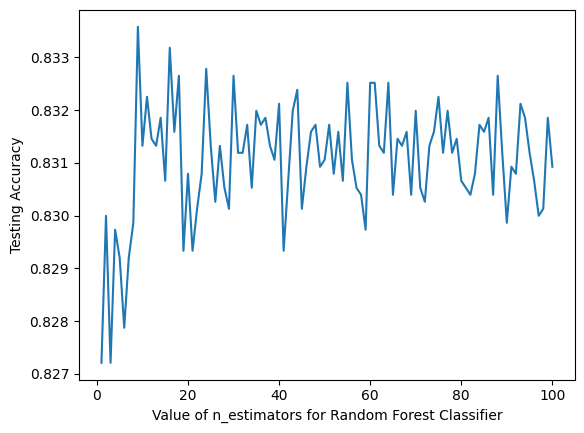

In [39]:
scores =[]
maxAccuracy = 0
maxIndex = 0
#To enumerate up to a 100 to find the best n value
for i,k in enumerate(range(1, 101)):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(xTrain, yTrain)
    rf_pred = rfc.predict(xTest)
    scores.append(accuracy_score(yTest, rf_pred))

for i, x in enumerate(scores):
    if i == 0:
        maxAccuracy = x
        maxIndex = i+1
    if x > maxAccuracy:
        maxAccuracy = x
        maxIndex = i +1

print(f"index : {maxIndex} \nAccuracy : {maxAccuracy}")

import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 101), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [40]:
model = RandomForestClassifier(n_estimators=maxIndex)
model.fit(xTrain,yTrain)

RandomForestClassifier(n_estimators=9)

In [41]:
model.score(xTest,yTest)

0.830791672192017

In [42]:
rf_pred = model.predict(xTest)

In [43]:
rfAccuracy = accuracy_score(yTest,rf_pred)
rfFscore = f1_score(yTest,rf_pred, average = "weighted")
print(f"The accuracy of Random Forest is {rfAccuracy}")
print(f"The F score of Random Forest is {rfFscore}")

The accuracy of Random Forest is 0.830791672192017
The F score of Random Forest is 0.8204634856696632


In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,rf_pred)
cm

array([[5280,  365],
       [ 911,  985]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

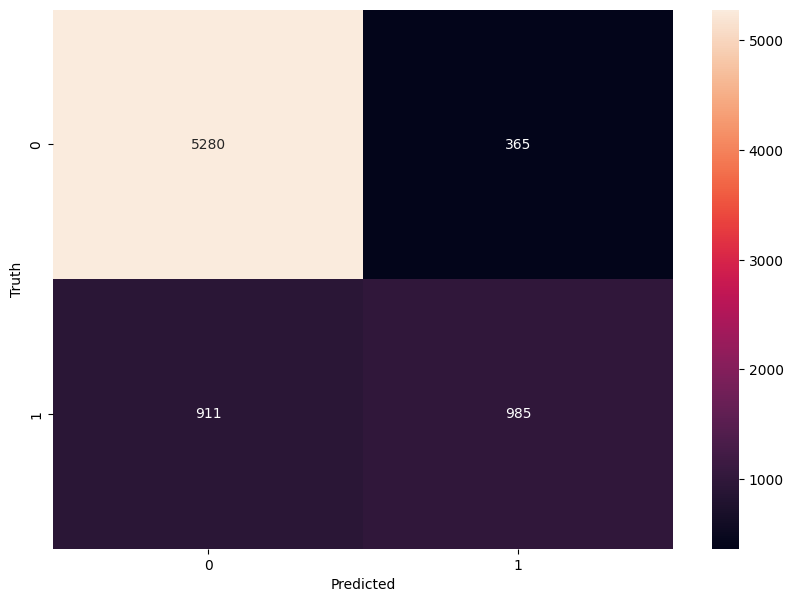

In [45]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [46]:
adult_rf_df = pd.DataFrame(data = rf_pred, columns = ["income"])
adult_rf_df.head(15)

,income
0,0
1,1
2,0
3,0
4,1
5,1
6,0
7,0
8,0
9,0


In [47]:
xTestDF.insert(len(xTestDF.columns), "Random Forest", adult_rf_df)
xTestDF.head(20)

,age,workclass,education,education_num,sex,capital_gain,capital_loss,yTest income,Decision Tree,Random Forest
0,3,1,9,9,0,0,0,0,0,0
1,3,4,14,14,1,0,0,1,1,1
2,3,1,7,7,1,0,0,0,0,0
3,3,1,10,10,0,0,0,0,0,0
4,3,1,13,13,1,0,2246,1,1,1
5,5,1,11,11,1,0,0,0,1,1
6,4,1,9,9,0,0,0,1,0,0
7,2,1,9,9,1,0,0,0,0,0
8,2,1,9,9,1,0,0,0,0,0
9,5,1,9,9,1,0,0,1,0,0


### K-Nearest-Neighbour Classification

In [48]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

#Finding the optimal k from 1-30
kRange = range(1,31)

scores = []
maxKAccuracy = 0
maxKValue = 0

for kValue in kRange:
    knnClass = KNeighborsClassifier(n_neighbors = kValue)
    knnClass.fit(xTrain,yTrain)
    knn_pred= knnClass.predict(xTest)
    scores.append(metrics.accuracy_score(yTest,knn_pred))
    
for i, x in enumerate(scores):
    if i == 0:
        maxKAccuracy = x
        maxKValue = i +1
    if x > maxKAccuracy:
        maxKAccuracy = x
        maxKValue = i +1

print(f"K value : {maxKValue} \nAccuracy : {maxKAccuracy}")

K value : 12 
Accuracy : 0.8395438270786368


Text(0, 0.5, 'Testing Accuracy')

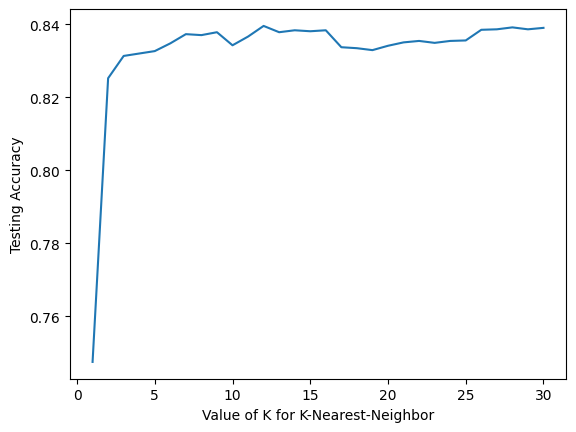

In [49]:
%matplotlib inline

plt.plot(kRange,scores)
plt.xlabel("Value of K for K-Nearest-Neighbor")
plt.ylabel("Testing Accuracy")

In [50]:
knnClass = KNeighborsClassifier(n_neighbors = maxKValue)
knnClass.fit(xTrain,yTrain)

KNeighborsClassifier(n_neighbors=12)

In [51]:
knnPredicted = knnClass.predict(xTest)
print(knnPredicted)

[0 1 0 ... 0 0 0]


In [52]:
knnAccuracy = accuracy_score(yTest,knnPredicted)
knnFscore = f1_score(yTest,knnPredicted,average = "weighted")
print(f"The accuracy of Random Forest is {knnAccuracy}")
print(f"The F score of Random Forest is {knnFscore}")

The accuracy of Random Forest is 0.8395438270786368
The F score of Random Forest is 0.8297946348821735


In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,knnPredicted)
cm

array([[5312,  333],
       [ 877, 1019]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

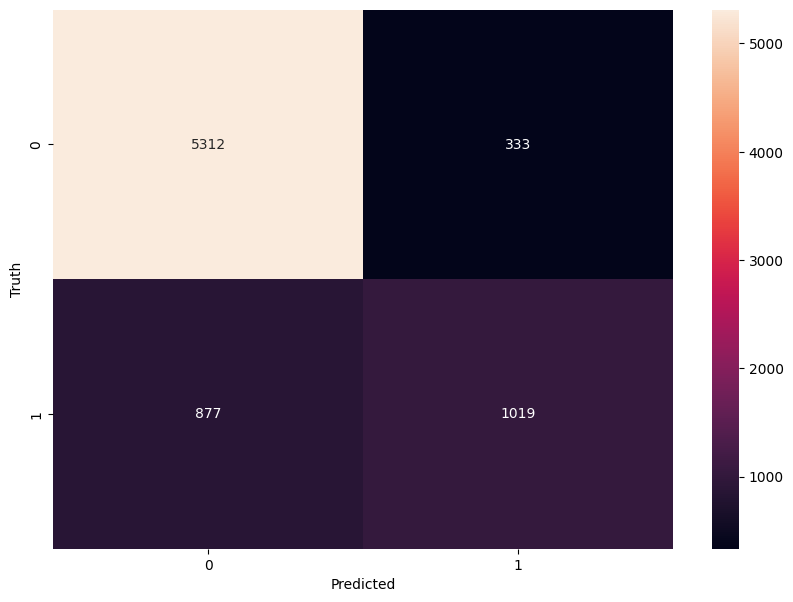

In [54]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [55]:
knnPredictedDF = pd.DataFrame(data = knnPredicted, columns = ["income"])
knnPredictedDF.head(10)

,income
0,0
1,1
2,0
3,0
4,0
5,1
6,0
7,0
8,0
9,0


In [56]:
xTestDF.insert(len(xTestDF.columns), "K-Nearest-Neighbors", knnPredictedDF)
xTestDF.head(20)

,age,workclass,education,education_num,sex,capital_gain,capital_loss,yTest income,Decision Tree,Random Forest,K-Nearest-Neighbors
0,3,1,9,9,0,0,0,0,0,0,0
1,3,4,14,14,1,0,0,1,1,1,1
2,3,1,7,7,1,0,0,0,0,0,0
3,3,1,10,10,0,0,0,0,0,0,0
4,3,1,13,13,1,0,2246,1,1,1,0
5,5,1,11,11,1,0,0,0,1,1,1
6,4,1,9,9,0,0,0,1,0,0,0
7,2,1,9,9,1,0,0,0,0,0,0
8,2,1,9,9,1,0,0,0,0,0,0
9,5,1,9,9,1,0,0,1,0,0,0


### Support Vector Machines


In [57]:
from sklearn import svm
clf = svm.SVC(kernel = "rbf",random_state = 1)
clf.fit(xTrain,yTrain)

SVC(random_state=1)

In [58]:
svm_pred = clf.predict(xTest)
print(svm_pred)

[0 0 0 ... 0 0 0]


In [59]:
svmAccuracy = accuracy_score(yTest,svm_pred)
svmFscore = f1_score(yTest,svm_pred,average = "weighted")
print(f"The accuracy of Support Vector Machines is {svmAccuracy}")
print(f"The F score of Support Vector Machines is {svmFscore}")

The accuracy of Support Vector Machines is 0.7886221986473942
The F score of Support Vector Machines is 0.7486908033008541


In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,svm_pred)
cm

array([[5459,  186],
       [1408,  488]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

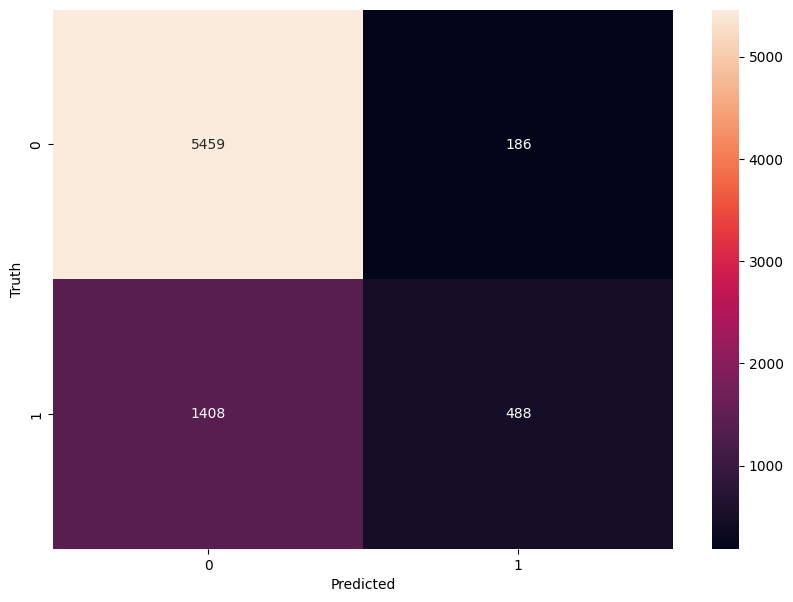

In [61]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [62]:
adult_svm_df = pd.DataFrame(data = svm_pred, columns = ["income"])
adult_svm_df.head(15)

,income
0,0
1,0
2,0
3,0
4,1
5,0
6,0
7,0
8,0
9,0


In [63]:
xTestDF.insert(len(xTestDF.columns), "Support Vector Machines", adult_svm_df)
xTestDF.head(20)

,age,workclass,education,education_num,sex,capital_gain,capital_loss,yTest income,Decision Tree,Random Forest,K-Nearest-Neighbors,Support Vector Machines
0,3,1,9,9,0,0,0,0,0,0,0,0
1,3,4,14,14,1,0,0,1,1,1,1,0
2,3,1,7,7,1,0,0,0,0,0,0,0
3,3,1,10,10,0,0,0,0,0,0,0,0
4,3,1,13,13,1,0,2246,1,1,1,0,1
5,5,1,11,11,1,0,0,0,1,1,1,0
6,4,1,9,9,0,0,0,1,0,0,0,0
7,2,1,9,9,1,0,0,0,0,0,0,0
8,2,1,9,9,1,0,0,0,0,0,0,0
9,5,1,9,9,1,0,0,1,0,0,0,0


### Neural Network

In [64]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver = "lbfgs", alpha = 1e-5, 
                    hidden_layer_sizes =(128,), random_state=1,activation = "relu", max_iter = 1000)
clf.fit(xTrain,yTrain)

c:\Users\Samuel Png\Desktop\CBA\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(128,), max_iter=1000,
              random_state=1, solver='lbfgs')

In [65]:
nn_pred = clf.predict(xTest)
print(nn_pred)

[0 0 0 ... 0 0 0]


In [66]:
nnAccuracy = accuracy_score(yTest,nn_pred)
nnFscore = f1_score(yTest,nn_pred,average = "weighted")
print(f"The accuracy of Neutral Network is {nnAccuracy}")
print(f"The F score of Neural Network is {nnFscore}")

The accuracy of Neutral Network is 0.7789417849091632
The F score of Neural Network is 0.7449165987332049


In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,nn_pred)
cm

array([[5348,  297],
       [1370,  526]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

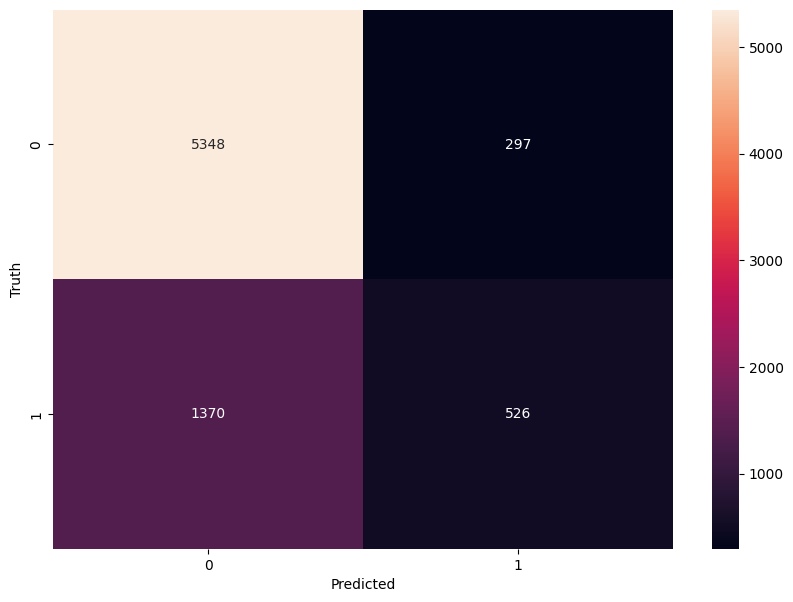

In [68]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [69]:
adult_nn_df = pd.DataFrame(data = nn_pred, columns = ["income"])
adult_nn_df.head(15)

,income
0,0
1,0
2,0
3,0
4,1
5,0
6,0
7,0
8,0
9,0


In [70]:
xTestDF.insert(len(xTestDF.columns), "Neural Network", adult_nn_df)
xTestDF.head(20)

,age,workclass,education,education_num,sex,capital_gain,capital_loss,yTest income,Decision Tree,Random Forest,K-Nearest-Neighbors,Support Vector Machines,Neural Network
0,3,1,9,9,0,0,0,0,0,0,0,0,0
1,3,4,14,14,1,0,0,1,1,1,1,0,0
2,3,1,7,7,1,0,0,0,0,0,0,0,0
3,3,1,10,10,0,0,0,0,0,0,0,0,0
4,3,1,13,13,1,0,2246,1,1,1,0,1,1
5,5,1,11,11,1,0,0,0,1,1,1,0,0
6,4,1,9,9,0,0,0,1,0,0,0,0,0
7,2,1,9,9,1,0,0,0,0,0,0,0,0
8,2,1,9,9,1,0,0,0,0,0,0,0,0
9,5,1,9,9,1,0,0,1,0,0,0,0,0


## Evaluation Metrics of Machine Learning Algorithms

In [71]:
dfMetrics = pd.DataFrame({ "KNN" : [knnAccuracy, knnFscore],
                   "Random Forest" : [rfAccuracy, rfFscore],
                   "Decision Tree" : [dtAccuracy, dtFscore],
                   "SVM" : [svmAccuracy , svmFscore],
                   "NN" : [nnAccuracy, nnFscore]} , columns = ["KNN" , "Random Forest" , "Decision Tree" , "SVM" ,"NN"], 
                  index = ["Accuracy", "Fscore"])
dfMetrics

,KNN,Random Forest,Decision Tree,SVM,NN
Accuracy,0.839544,0.830792,0.835300,0.788622,0.778942
Fscore,0.829795,0.820463,0.824596,0.748691,0.744917
